<span style="font-size:24px;">Import Necessary Libraries.</span>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import TimestampedGeoJson

# Load the CSV file
data = pd.read_csv('v6.csv')


<span style="font-size:24px;">Alerts Count based on Time.</span>


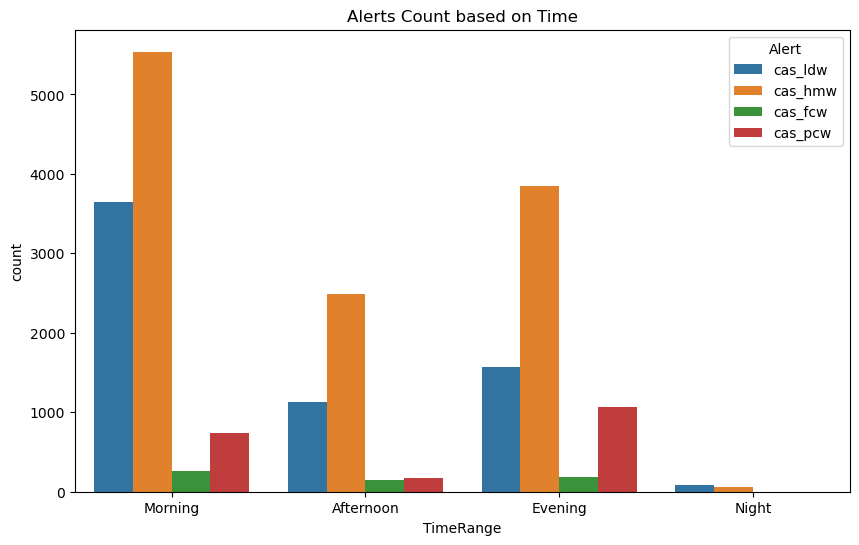

In [2]:
# Load the CSV file
data = pd.read_csv('v6.csv')

# Countplot of Alerts based on Time
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='TimeRange', hue='Alert')
plt.title('Alerts Count based on Time')
plt.show()


<span style="font-size:24px;">Alerts Count based on Date.</span>


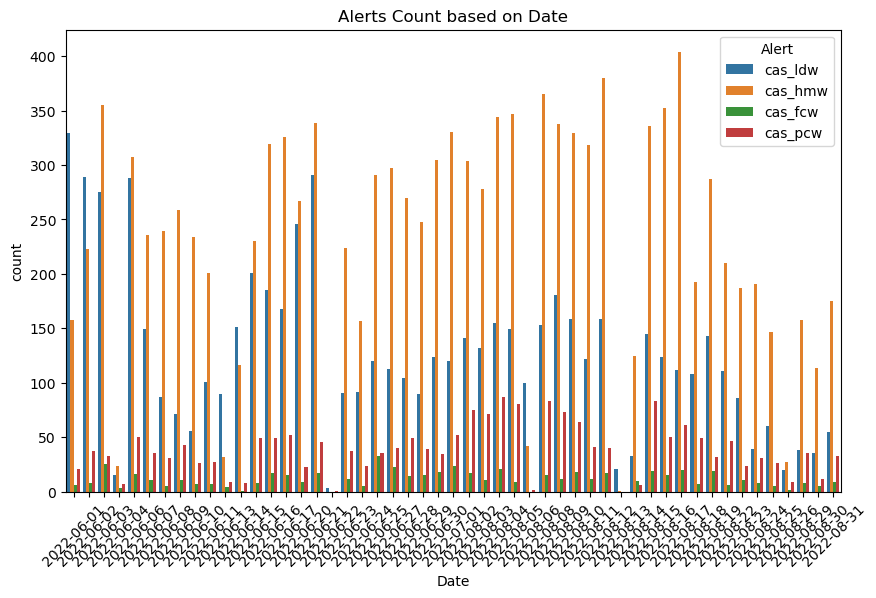

In [3]:
# Load the CSV file
data = pd.read_csv('v6.csv')

# Countplot of Alerts based on Date
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Date', hue='Alert')
plt.title('Alerts Count based on Date')
plt.xticks(rotation=45)
plt.show()


<span style="font-size:24px;">Alert Types vs Speed.</span>


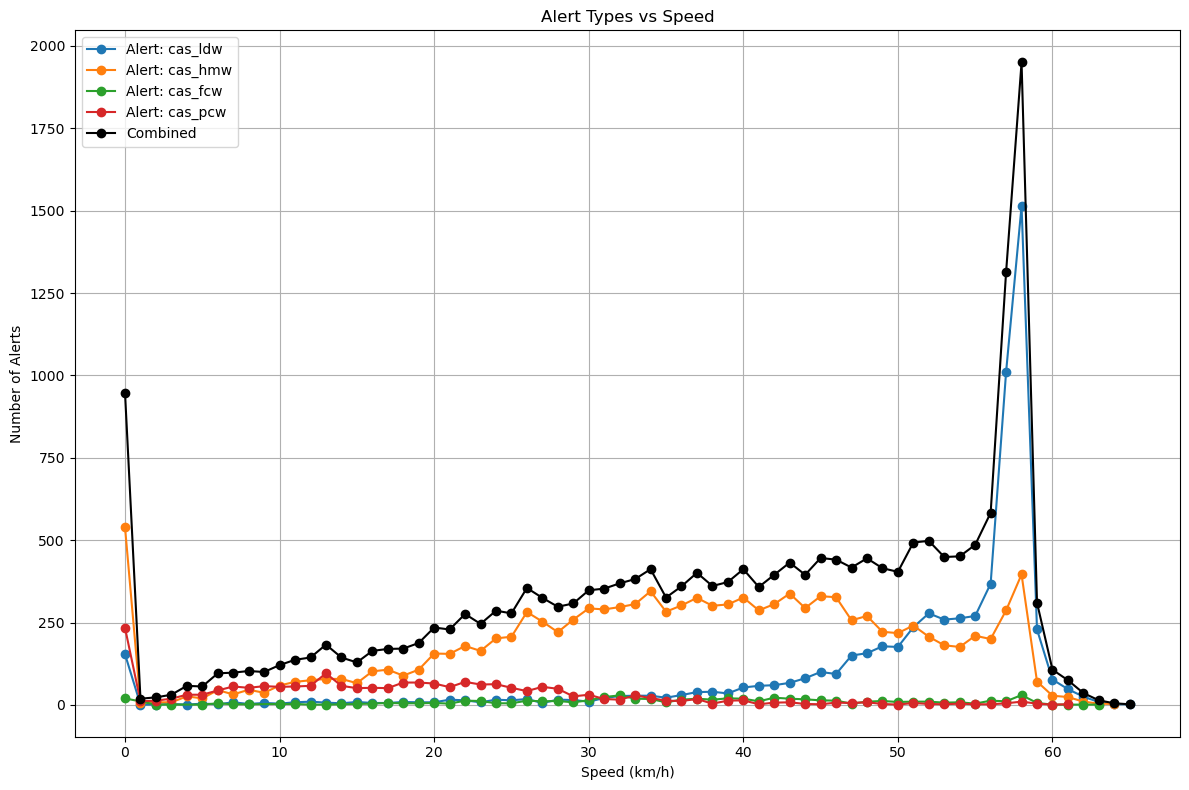

In [4]:
# Load the CSV file
data = pd.read_csv('v6.csv')

data['Time'] = pd.to_datetime(data['Time'])

# Create a list of unique alert types
alert_types = data['Alert'].unique()

# Plot alert types vs speed individually and combined
plt.figure(figsize=(12, 8))

# Plot individual alert types
for alert_type in alert_types:
    alert_data = data[data['Alert'] == alert_type]
    alerts_vs_speed = alert_data.groupby('Speed')['Alert'].count()
    
    plt.plot(alerts_vs_speed.index, alerts_vs_speed.values, marker='o', label=f'Alert: {alert_type}')

# Plot combined view
total_alerts_by_speed = data.groupby('Speed')['Alert'].count()
plt.plot(total_alerts_by_speed.index, total_alerts_by_speed.values, marker='o', label='Combined', color='black')

# Customize plot
plt.title('Alert Types vs Speed')
plt.xlabel('Speed (km/h)')
plt.ylabel('Number of Alerts')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<span style="font-size:24px;">Alert Types VS Speed VS time_range Per Alert Diffrent Plot.</span>


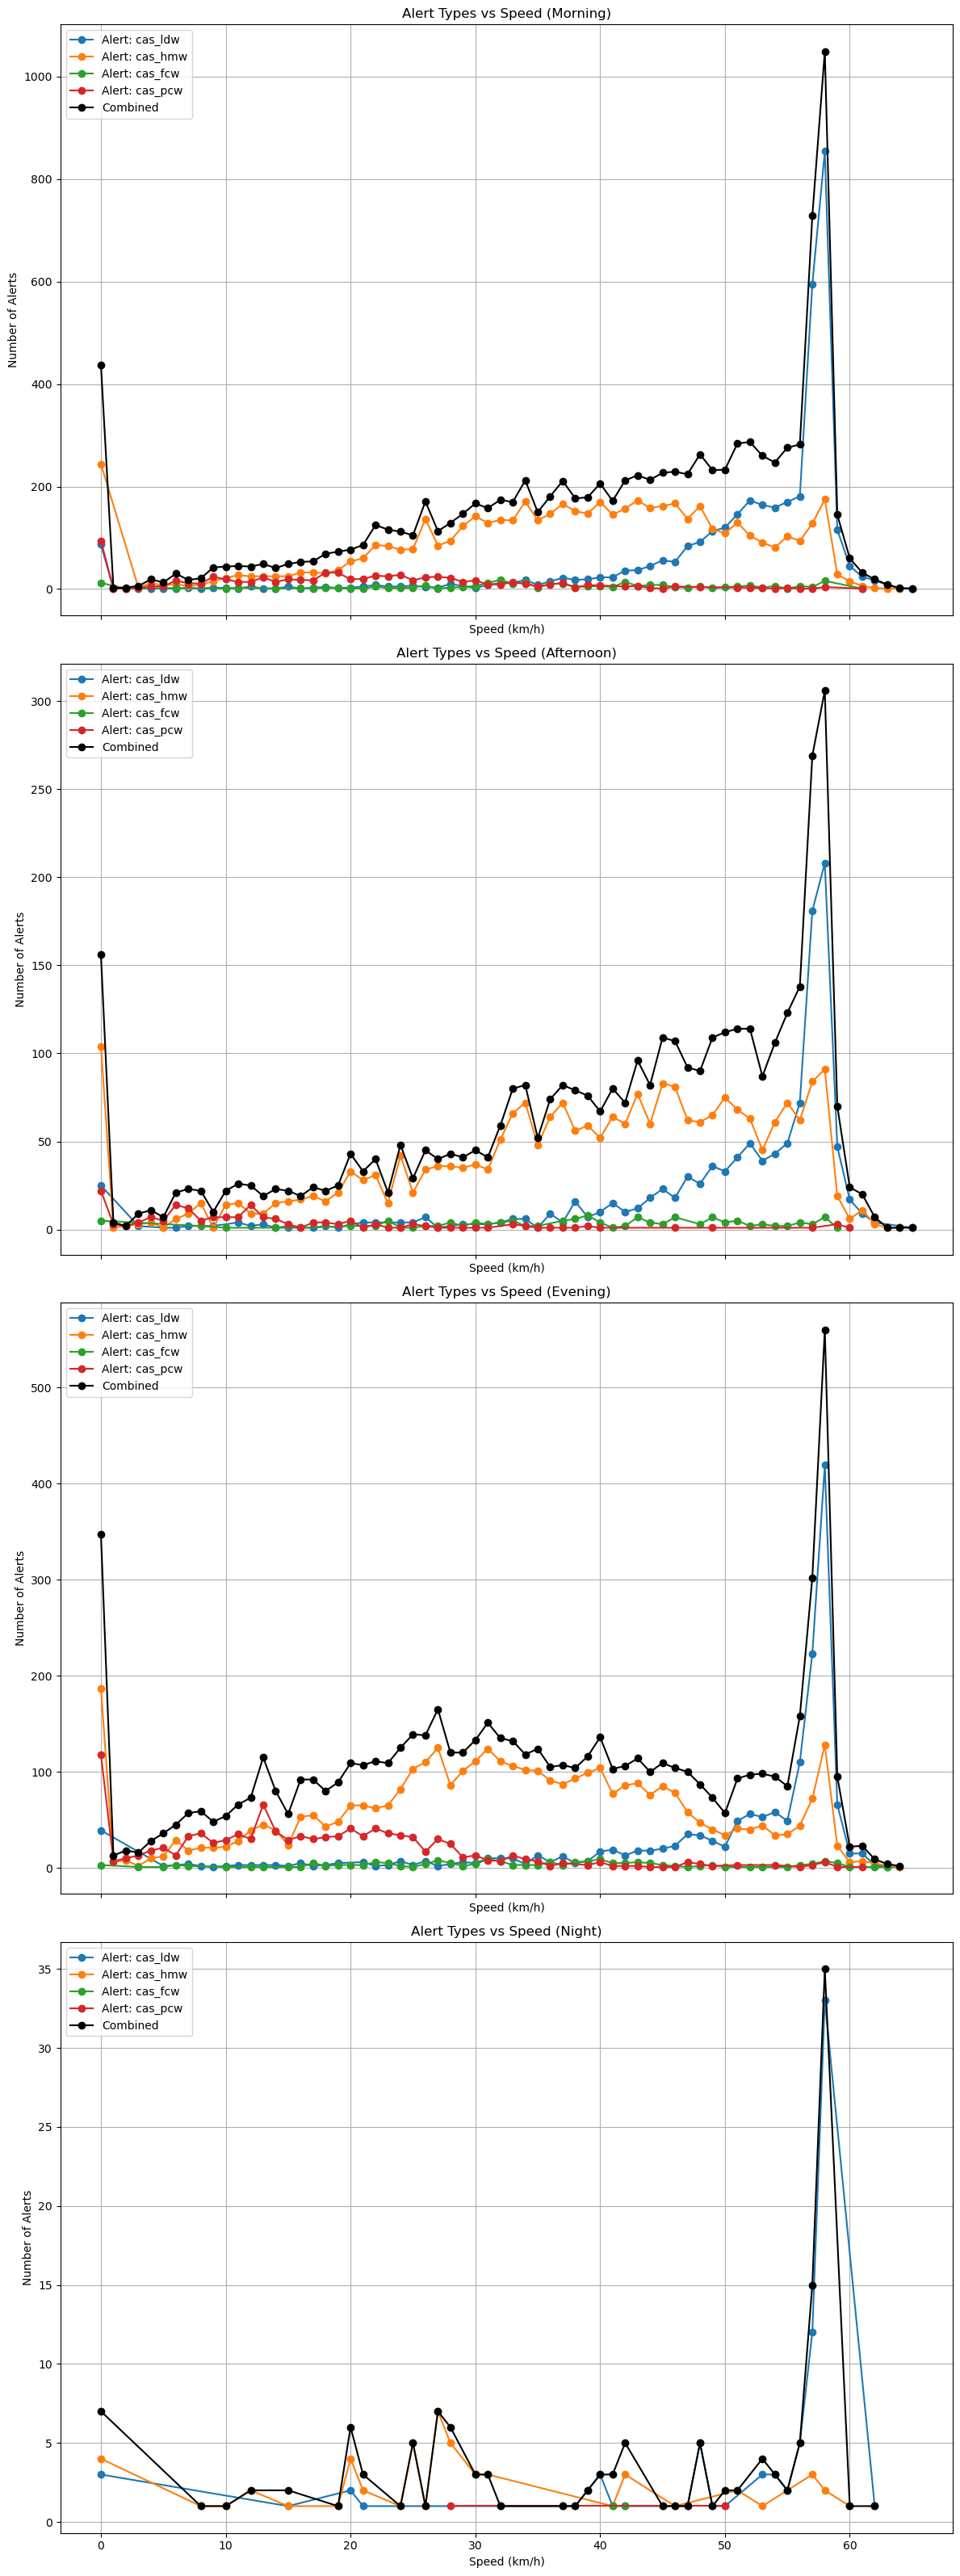

In [5]:
# Load the CSV file
data = pd.read_csv('v6.csv')

# Per Alert
data['Time'] = pd.to_datetime(data['Time'])

# Create a list of unique alert types
alert_types = data['Alert'].unique()

# Create a list of unique time ranges
time_ranges = data['TimeRange'].unique()

# Create subplots for each time range
num_time_ranges = len(time_ranges)
fig, axes = plt.subplots(nrows=num_time_ranges, ncols=1, figsize=(12, 8*num_time_ranges), sharex=True)

for i, time_range in enumerate(time_ranges):
    # Filter data for the specific time range
    time_range_data = data[data['TimeRange'] == time_range]
    
    # Plot alert types vs speed for the current time range
    ax = axes[i]
    ax.set_title(f'Alert Types vs Speed ({time_range})')
    
    for alert_type in alert_types:
        alert_data = time_range_data[time_range_data['Alert'] == alert_type]
        alerts_vs_speed = alert_data.groupby('Speed')['Alert'].count()
        ax.plot(alerts_vs_speed.index, alerts_vs_speed.values, marker='o', label=f'Alert: {alert_type}')
    
    total_alerts_by_speed = time_range_data.groupby('Speed')['Alert'].count()
    ax.plot(total_alerts_by_speed.index, total_alerts_by_speed.values, marker='o', label='Combined', color='black')
    
    # Customize subplot
    ax.set_xlabel('Speed (km/h)')
    ax.set_ylabel('Number of Alerts')
    ax.legend()
    ax.grid(True)

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()



<span style="font-size:24px;">Point Plot On Maps With Time Slider.</span>


In [6]:
import pandas as pd
import folium
from folium.plugins import TimestampedGeoJson

# Read the CSV data into a pandas DataFrame
data = pd.read_csv('v6.csv')

# Group the data by alert type
alert_groups = data.groupby('Alert')

# Define a function to determine the point color based on the time range
def get_point_color(time_range):
    if time_range == 'Morning':
        return 'green'
    elif time_range == 'Evening':
        return 'yellow'
    elif time_range == 'Afternoon':
        return 'red'
    else:
        return 'black'

# Iterate through each alert group and create a separate map
for alert_type, group_data in alert_groups:
    # Create a map centered around the average latitude and longitude of the group data
    center_lat = group_data['Lat'].mean()
    center_long = group_data['Long'].mean()
    m = folium.Map(location=[center_lat, center_long], zoom_start=10)

    # Define a function to create a GeoJSON feature for each row
    def create_geojson_feature(row):
        point_color = get_point_color(row['TimeRange'])
        return {
            'type': 'Feature',
            'geometry': {
                'type': 'Point',
                'coordinates': [row['Long'], row['Lat']],
            },
            'properties': {
                'icon': 'circle',
                'iconstyle': {
                    'fillOpacity': 0.8,
                    'color': point_color,
                    'radius': 6,
                },
                'popup': f"Alert: {row['Alert']}<br>Date: {row['Date']}<br>Time: {row['Time']}<br>Speed: {row['Speed']}",
                'time': pd.Timestamp(row['Date'] + ' ' + row['Time']).timestamp() * 1000,
            },
        }

    # Apply the function to each row in the group and store the features in a list
    features = group_data.apply(create_geojson_feature, axis=1).tolist()

    # Create a TimestampedGeoJson layer using the features
    TimestampedGeoJson(
        {'type': 'FeatureCollection', 'features': features},
        period='PT1M',  # Update interval (1 minute)
        add_last_point=True,
    ).add_to(m)

    # Save the map to an HTML file named after the alert type
    m.save(f'{alert_type}_map1.html')



<span style="font-size:24px;">Dividing Alerts On Zoom.</span>


In [7]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the CSV data into a Pandas DataFrame
data = pd.read_csv("v6.csv")

# Get unique alert types
alert_types = data['Alert'].unique()

# Iterate through each alert type
for alert_type in alert_types:
    # Create a map centered on the average latitude and longitude of the data
    map_center = [data['Lat'].mean(), data['Long'].mean()]
    m = folium.Map(location=map_center, zoom_start=10)

    # Filter data for the current alert type
    filtered_data = data[data['Alert'] == alert_type]

    # Create a MarkerCluster for better visualization of multiple points
    marker_cluster = MarkerCluster().add_to(m)

    # Iterate through each row of the filtered data and add markers
    for index, row in filtered_data.iterrows():
        folium.Marker(
            location=[row['Lat'], row['Long']],
            popup=f"Alert Type: {row['Alert']}<br>Time: {row['Time']}<br>Speed: {row['Speed']}",
        ).add_to(marker_cluster)

    # Save the map as an HTML file
    map_filename = f"{alert_type}_map2.html"
    m.save(map_filename)

    print(f"Map for {alert_type} saved as {map_filename}")



Map for cas_ldw saved as cas_ldw_map2.html
Map for cas_hmw saved as cas_hmw_map2.html
Map for cas_fcw saved as cas_fcw_map2.html
Map for cas_pcw saved as cas_pcw_map2.html



<span style="font-size:24px;">Dividing Alerts On Zoom With Speed.</span>

In [8]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the CSV data into a Pandas DataFrame
data = pd.read_csv("v6.csv")

# Get unique alert types
alert_types = data['Alert'].unique()

# Iterate through each alert type
for alert_type in alert_types:
    # Create a map centered on the average latitude and longitude of the data
    map_center = [data['Lat'].mean(), data['Long'].mean()]
    m = folium.Map(location=map_center, zoom_start=10)

    # Filter data for the current alert type
    filtered_data = data[data['Alert'] == alert_type]

    # Create a MarkerCluster for better visualization of multiple points
    marker_cluster = MarkerCluster().add_to(m)

    # Iterate through each row of the filtered data and add markers
    for index, row in filtered_data.iterrows():
        folium.Marker(
            location=[row['Lat'], row['Long']],
            popup=f"Alert Type: {row['Alert']}<br>Time: {row['Time']}<br>Speed: {row['Speed']}<br>Time Range: {row['TimeRange']}",
        ).add_to(marker_cluster)

    # Save the map as an HTML file
    map_filename = f"{alert_type}_map3.html"
    m.save(map_filename)

    print(f"Map for {alert_type} saved as {map_filename}")


Map for cas_ldw saved as cas_ldw_map3.html
Map for cas_hmw saved as cas_hmw_map3.html
Map for cas_fcw saved as cas_fcw_map3.html
Map for cas_pcw saved as cas_pcw_map3.html



<span style="font-size:24px;">Plotting Alerts Per Day Using Slider.</span>

In [9]:
import pandas as pd
import folium
from folium.plugins import TimestampedGeoJson

# Load the CSV data into a Pandas DataFrame
data = pd.read_csv('v6.csv')

# Create a Folium map centered at a specific latitude and longitude
m = folium.Map(location=[data['Lat'].mean(), data['Long'].mean()], zoom_start=12)

# Define speed ranges and corresponding predefined colors
speed_ranges = [
    (0, 10, 'green'),
    (10, 20, 'lightgreen'),
    (20, 30, 'orange'),
    (30, 40, 'red'),
    (40, 50, 'darkred'),
    (50, 60, 'purple')
]

# Function to determine color based on speed
def get_speed_color(speed):
    for range_min, range_max, color in speed_ranges:
        if range_min <= speed < range_max:
            return color
    return 'black'  # Default color for speeds outside defined ranges

# Sort the data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)

# Create a GeoJSON data structure
features = []

for index, row in data.iterrows():
    lat, lon, speed, alert, date = row['Lat'], row['Long'], row['Speed'], row['Alert'], row['Date']
    
    # Get the color based on the speed range
    color = get_speed_color(speed)
    
    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [lon, lat]
        },
        'properties': {
            'time': date.strftime('%Y-%m-%d'),  # Format date as required by TimestampedGeoJson
            'icon': 'circle',
            'iconstyle': {
                'color': color,
                'fillColor': color,
                'fillOpacity': 0.8,
                'stroke': 'true',
                'radius': 6
            },
            'popup': f"Alert: {alert}<br>Speed: {speed} km/h"
        }
    }
    features.append(feature)

# Create TimestampedGeoJson layer
TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': features},
    period='P1D',  # Change the period as needed
    duration='P1D',  # Duration of each data point's visibility
    auto_play=True,
    add_last_point=True,
    transition_time=1000  # Transition time in milliseconds
).add_to(m)

# Display the map
m.save('interactive_date_animation_map.html')  # Save the map to an HTML file



<span style="font-size:24px;">Interactive_datetime_animation_map.</span>

In [10]:
import pandas as pd
import folium
from folium.plugins import TimestampedGeoJson

# Load the CSV data into a Pandas DataFrame
data = pd.read_csv('v6.csv')

# Create a Folium map centered at a specific latitude and longitude
m = folium.Map(location=[data['Lat'].mean(), data['Long'].mean()], zoom_start=12)

# Define speed ranges and corresponding predefined colors
speed_ranges = [
    (0, 10, 'green'),
    (10, 20, 'lightgreen'),
    (20, 30, 'orange'),
    (30, 40, 'red'),
    (40, 50, 'darkred'),
    (50, 60, 'purple')
]

# Function to determine color based on speed
def get_speed_color(speed):
    for range_min, range_max, color in speed_ranges:
        if range_min <= speed < range_max:
            return color
    return 'black'  # Default color for speeds outside defined ranges

# Sort the data by date and time
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.sort_values(by='Datetime', inplace=True)

# Create a GeoJSON data structure
features = []

for index, row in data.iterrows():
    lat, lon, speed, alert, datetime = row['Lat'], row['Long'], row['Speed'], row['Alert'], row['Datetime']
    
    # Get the color based on the speed range
    color = get_speed_color(speed)
    
    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [lon, lat]
        },
        'properties': {
            'time': datetime.strftime('%Y-%m-%dT%H:%M:%S'),  # Format datetime as required by TimestampedGeoJson
            'icon': 'circle',
            'iconstyle': {
                'color': color,
                'fillColor': color,
                'fillOpacity': 0.8,
                'stroke': 'true',
                'radius': 6
            },
            'popup': f"Alert: {alert}<br>Speed: {speed} km/h"
        }
    }
    features.append(feature)

# Create TimestampedGeoJson layer
TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': features},
    period='PT1M',  # Change the period as needed
    duration='PT1M',  # Duration of each data point's visibility
    auto_play=True,
    add_last_point=True,
    transition_time=1000  # Transition time in milliseconds
).add_to(m)

# Display the map
m.save('interactive_datetime_animation_map.html')  # Save the map to an HTML file

C:\Users\Vishakha\AppData\Local\Temp\ipykernel_2088\782082529.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])



<span style="font-size:24px;">Alert Type vs Time Range, Safe Speed And Danger Speed.</span>

In [11]:
import pandas as pd
# Load CSV data into a Pandas DataFrame
data = pd.read_csv("v6.csv")
# Parse datetime
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
# Group by alert type and time range
grouped = data.groupby(['Alert', 'TimeRange'])
# Create a list to hold the results
results = []
# Calculate safe and danger speeds for each group
for (alert, time_range), group in grouped:
    speed_distribution = group['Speed']
    safe_speed_threshold = speed_distribution.mean()  # You can customize this based on your analysis
    danger_speed_threshold = speed_distribution.quantile(0.9)  # Adjust the quantile value as needed

    results.append({
        'Alert Type': alert,
        'Time Range': time_range,
        'Safe Speed Threshold (km/h)': safe_speed_threshold,
        'Danger Speed Threshold (km/h)': danger_speed_threshold
    })
# Create a DataFrame from the results list
results_df = pd.DataFrame(results)
# Display the DataFrame
print(results_df)

C:\Users\Vishakha\AppData\Local\Temp\ipykernel_2088\2945451682.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


   Alert Type Time Range  Safe Speed Threshold (km/h)  \
0     cas_fcw  Afternoon                    38.328671   
1     cas_fcw    Evening                    34.417582   
2     cas_fcw    Morning                    36.608365   
3     cas_fcw      Night                    41.500000   
4     cas_hmw  Afternoon                    38.325040   
5     cas_hmw    Evening                    32.306435   
6     cas_hmw    Morning                    36.832972   
7     cas_hmw      Night                    29.090909   
8     cas_ldw  Afternoon                    50.094690   
9     cas_ldw    Evening                    50.366539   
10    cas_ldw    Morning                    51.436164   
11    cas_ldw      Night                    50.188235   
12    cas_pcw  Afternoon                    13.655367   
13    cas_pcw    Evening                    16.694915   
14    cas_pcw    Morning                    19.604082   
15    cas_pcw      Night                    39.000000   

    Danger Speed Threshold (km


<span style="font-size:24px;">Cluster For Each Alert.</span>

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import folium

# Load CSV data into a Pandas DataFrame
data = pd.read_csv("v6.csv")

# Cluster the data based on latitude and longitude
coordinates = data[['Lat', 'Long']]
num_clusters = 5  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(coordinates)
data['Cluster'] = kmeans.labels_

# Group by alert
grouped_alert = data.groupby('Alert')

# Create a map for each alert type
for alert_type, alert_group in grouped_alert:
    # Create a map for the current alert type
    m = folium.Map(location=[data['Lat'].mean(), data['Long'].mean()], zoom_start=10)
    
    # Group by cluster
    grouped = alert_group.groupby(['Cluster'])

    # Calculate safe and danger speeds for each cluster
    for cluster, group in grouped:
        cluster_center = kmeans.cluster_centers_[cluster]
        popup_text = f"Cluster: {cluster}\n"
        popup_text += f"Alert: {alert_type}\n\n"

        
        # Group by time range for the current alert type and cluster
        grouped_time = group.groupby('TimeRange')

        # Calculate safe and danger speeds for each time range
        for time_range, time_group in grouped_time:
            speed_distribution = time_group['Speed']
            safe_speed_threshold = speed_distribution.mean()  # You can customize this based on your analysis
            danger_speed_threshold = speed_distribution.quantile(0.9)  # Adjust the quantile value as needed
            
            popup_text += f"Time Range: {time_range}\n"
            popup_text += f"Safe Speed: {safe_speed_threshold:.2f} km/h\n"
            popup_text += f"Danger Speed: {danger_speed_threshold:.2f} km/h\n\n"
        
        folium.Marker(location=[cluster_center[0], cluster_center[1]],
                      popup=folium.Popup(popup_text, parse_html=True)).add_to(m)

    # Save the map for the current alert type
    map_filename = f'cluster_map_{alert_type}.html'
    m.save(map_filename)


c:\Users\Vishakha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



<span style="font-size:24px;">Black Spots Using Clustering.</span>

In [13]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans

# Read the CSV data
data = pd.read_csv('v6.csv')

# Filter data for the specific alerts
alerts = ['cas_fcw', 'cas_hmw', 'cas_pcw', 'cas_ldw']

# Apply KMeans clustering
num_clusters = 5  # You can adjust this value

# Process each alert separately
for alert in alerts:
    alert_data = data[data['Alert'] == alert]
    
    if alert_data.empty:
        continue

    # Create a Folium map centered at a specific location
    m = folium.Map(location=[alert_data['Lat'].mean(), alert_data['Long'].mean()], zoom_start=10)

    # Create a MarkerCluster layer
    marker_cluster = MarkerCluster().add_to(m)

    # Add markers for each incident
    for idx, row in alert_data.iterrows():
        folium.Marker([row['Lat'], row['Long']], popup=alert).add_to(marker_cluster)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(alert_data[['Lat', 'Long']])

    # Get cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_

    # Group by cluster and alert
    alert_data_copy = alert_data.copy()  # Create a copy to avoid SettingWithCopyWarning
    alert_data_copy['Cluster'] = cluster_labels
    grouped = alert_data_copy.groupby(['Cluster', 'Alert'])

    # Calculate safe and danger speeds for each cluster and alert
    for (cluster, _), group in grouped:
        cluster_center = cluster_centers[cluster]
        popup_text = f"<b>Cluster: {cluster}</b><br><br>"
        
        # Calculate safe and danger speeds
        speed_distribution = group['Speed']
        safe_speed_threshold = speed_distribution.mean()  # You can customize this based on your analysis
        danger_speed_threshold = speed_distribution.quantile(0.9)  # Adjust the quantile value as needed
        
        # Get unique time ranges in the cluster
        unique_time_ranges = group['TimeRange'].unique()
        
        # Add time range and speed info to popup
        for time_range in unique_time_ranges:
            time_range_group = group[group['TimeRange'] == time_range]
            popup_text += f"Time Range: {time_range}<br>"
            popup_text += f"Safe Speed: {safe_speed_threshold:.2f} km/h<br>"
            popup_text += f"Danger Speed: {danger_speed_threshold:.2f} km/h<br><br>"
    
        folium.Marker(
            location=[cluster_center[0], cluster_center[1]],
            popup=folium.Popup(popup_text, parse_html=True),
            icon=folium.Icon(color='black', icon='info-sign')
        ).add_to(m)

    # Save the map to an HTML file
    m.save(f'{alert}_black_spot_map19.html')


c:\Users\Vishakha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vishakha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Vishakha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Vishakha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning